In [33]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv("./data/data.csv")
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
816,817,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.9250,NaN,S
769,770,0,3,"Gronnestad, Mr. Daniel Danielsen",male,32.0,0,0,8471,8.3625,NaN,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [36]:
#删除缺失值过多的列，和观察判断来说和预测的y没有关系的列
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)  # inplace=true 在原始数据里面删除，不用重新复制，axis=1,删除列

In [37]:
#处理缺失值，对缺失值较多的列进行填补，有一些特征只确实一两个值，可以采取直接删除记录的方法
data["Age"] = data["Age"].fillna(data["Age"].mean())
data = data.dropna()

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.5+ KB


In [39]:
#将分类变量转换为数值型变量

#将二分类变量转换为数值型变量
#astype能够将一个pandas对象转换为某种类型，和apply(int(x))不同，astype可以将文本类转换为数字，用这个方式可以很便捷地将二分类特征转换为0~1
data["Sex"] = (data["Sex"]== "male").astype("int")

In [40]:
#将三分类变量转换为数值型变量
labels = data['Embarked'].unique().tolist()
labels

['S', 'C', 'Q']

In [41]:
data['Embarked'] = data['Embarked'].apply(lambda x : labels.index(x))

In [42]:
data.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
232,233,0,2,1,59.000000,0,0,13.5000,0
383,384,1,1,0,35.000000,1,0,52.0000,0
101,102,0,3,1,29.699118,0,0,7.8958,0
636,637,0,3,1,32.000000,0,0,7.9250,0
701,702,1,1,1,35.000000,0,0,26.2875,0
157,158,0,3,1,30.000000,0,0,8.0500,0
121,122,0,3,1,29.699118,0,0,8.0500,0
741,742,0,1,1,36.000000,1,0,78.8500,0
265,266,0,2,1,36.000000,0,0,10.5000,0
344,345,0,2,1,36.000000,0,0,13.0000,0


In [43]:
# 切分数据和标签
X = data.iloc[:,data.columns!='Survived']
y = data.iloc[:,data.columns=='Survived']

In [44]:
y.sample(5)

,Survived
223,0
579,1
778,0
722,0
157,0


In [45]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

In [46]:
#修正测试集和训练集的索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
    
#查看分好的训练集和测试集
Xtrain.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,293,2,1,36.000000,0,0,12.875,1
1,498,3,1,29.699118,0,0,15.100,0
2,189,3,1,40.000000,1,1,15.500,2
3,852,3,1,74.000000,0,0,7.775,0
4,756,2,1,0.670000,1,1,14.500,0


In [47]:
clf = DecisionTreeClassifier(random_state=20)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.7490636704119851

In [56]:
# 特征重要性
print(clf.feature_importances_)
print(Xtrain.columns)
dict(zip(Xtrain.columns,clf.feature_importances_))

[0.25865013 0.09566648 0.27898159 0.1230184  0.03959016 0.00859306
 0.17938653 0.01611365]
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


{'PassengerId': 0.2586501278948344,
 'Pclass': 0.09566648236612356,
 'Sex': 0.2789815929146577,
 'Age': 0.12301839694663169,
 'SibSp': 0.03959016045691723,
 'Parch': 0.008593059239610961,
 'Fare': 0.17938653465437052,
 'Embarked': 0.016113645526853942}

0.8166624106230849


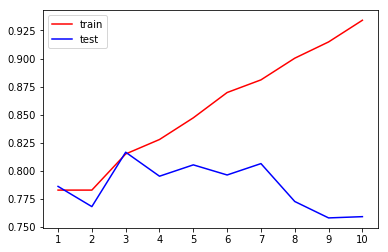

In [57]:
# 在不同max_depth下观察模型的拟合情况
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                 ,max_depth=i+1
                                 ,criterion="entropy"
                               )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()
#这里为什么使用“entropy”？因为我们注意到，在最大深度=3的时候，模型拟合不足，在训练集和测试集上的表现接
# 近，但却都不是非常理想，只能够达到83%左右，所以我们要使用entropy。

In [58]:
# 用网格搜索调整参
parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(2,5)]
              ,'min_samples_leaf':[*range(1,50,5)]  # 一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分
# 枝就不会发生
              ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]  # 限制信息增益的大小
             }

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)

GS.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}